In [69]:

import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
movies = pd.read_csv('movies_metacritic2.csv')
movies

,Unnamed: 0,movie,year,url,metascore,userscore,release_date
0,0,Roma,2018,/movie/roma,96,7.7,November 21
1,1,Amazing Grace,2018,/movie/amazing-grace-1972,94,8.2,November 23
2,2,Shoplifters,2018,/movie/shoplifters,93,8.4,November 23
3,3,Shoah: Four Sisters,2018,/movie/shoah-four-sisters,93,tbd,November 14
4,4,Gavagai,2018,/movie/gavagai,91,6.0,August 3
...,...,...,...,...,...,...,...
2788,2788,Big Gold Brick,2022,/movie/big-gold-brick,30,3.8,February 25
2789,2789,Mother Schmuckers,2022,/movie/mother-schmuckers,28,tbd,March 4
2790,2790,Blacklight,2022,/movie/blacklight,27,3.9,February 11
2791,2791,Me Time,2022,/movie/me-time,25,3.7,August 26


In [8]:
movies = movies.drop('Unnamed: 0', axis=1)
movies

,movie,year,url,metascore,userscore,release_date
0,Roma,2018,/movie/roma,96,7.7,November 21
1,Amazing Grace,2018,/movie/amazing-grace-1972,94,8.2,November 23
2,Shoplifters,2018,/movie/shoplifters,93,8.4,November 23
3,Shoah: Four Sisters,2018,/movie/shoah-four-sisters,93,tbd,November 14
4,Gavagai,2018,/movie/gavagai,91,6.0,August 3
...,...,...,...,...,...,...
2788,Big Gold Brick,2022,/movie/big-gold-brick,30,3.8,February 25
2789,Mother Schmuckers,2022,/movie/mother-schmuckers,28,tbd,March 4
2790,Blacklight,2022,/movie/blacklight,27,3.9,February 11
2791,Me Time,2022,/movie/me-time,25,3.7,August 26


In [9]:
movies.isna().sum()

movie           0
year            0
url             0
metascore       0
userscore       0
release_date    0
dtype: int64

In [10]:
movies[movies.duplicated()]

,movie,year,url,metascore,userscore,release_date


In [22]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   movie                      2793 non-null   object        
 1   year                       2793 non-null   int64         
 2   url                        2793 non-null   object        
 3   metascore                  2793 non-null   int64         
 4   userscore                  2793 non-null   object        
 5   release_date               2793 non-null   object        
 6   release_date_convert       2793 non-null   datetime64[ns]
 7   six_months_before_release  2793 non-null   object        
 8   six_months_after_release   2793 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 196.5+ KB


In [29]:
movies['userscore'].unique()

array(['7.7', '8.2', '8.4', 'tbd', '6.0', '8.0', '8.5', '7.5', '7.8',
       '7.9', '7.3', '8.1', '7.4', '8.3', '7.1', '7.6', '6.3', '6.5',
       '6.7', '5.0', '6.9', '5.7', '7.0', '5.5', '6.1', '6.4', '6.8',
       '7.2', '4.0', '6.6', '5.8', '6.2', '5.6', '3.6', '5.9', '5.3',
       '4.6', '4.8', '4.4', '4.9', '8.6', '5.2', '5.1', '4.5', '5.4',
       '4.3', '4.7', '2.9', '3.9', '3.8', '4.1', '4.2', '3.2', '3.4',
       '3.5', '1.4', '2.7', '2.4', '8.7', '0.5', '8.8', '1.5', '3.3',
       '3.0', '2.0', '8.9', '3.1', '1.9', '2.6', '0.8', '2.8', '1.0',
       '2.5', '0.4', '0.3', '3.7', '2.3', '2.1', '2.2', '1.8', '0.6',
       '1.6', '1.1'], dtype=object)

In [12]:
# Convert release_date column to datetime object
movies['release_date_convert'] = pd.to_datetime(movies['release_date'] + ' ' + movies['year'].astype(str), format='%B %d %Y')
movies

,movie,year,url,metascore,userscore,release_date,release_date_convert
0,Roma,2018,/movie/roma,96,7.7,November 21,2018-11-21
1,Amazing Grace,2018,/movie/amazing-grace-1972,94,8.2,November 23,2018-11-23
2,Shoplifters,2018,/movie/shoplifters,93,8.4,November 23,2018-11-23
3,Shoah: Four Sisters,2018,/movie/shoah-four-sisters,93,tbd,November 14,2018-11-14
4,Gavagai,2018,/movie/gavagai,91,6.0,August 3,2018-08-03
...,...,...,...,...,...,...,...
2788,Big Gold Brick,2022,/movie/big-gold-brick,30,3.8,February 25,2022-02-25
2789,Mother Schmuckers,2022,/movie/mother-schmuckers,28,tbd,March 4,2022-03-04
2790,Blacklight,2022,/movie/blacklight,27,3.9,February 11,2022-02-11
2791,Me Time,2022,/movie/me-time,25,3.7,August 26,2022-08-26


In [2]:
pytrend = TrendReq()

In [13]:

keyword = 'Python'
pytrend.build_payload(kw_list=[keyword])
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df

,Python,isPartial
date,,
2018-03-25,51,False
2018-04-01,49,False
2018-04-08,51,False
2018-04-15,53,False
2018-04-22,53,False
...,...,...
2023-02-12,89,False
2023-02-19,92,False
2023-02-26,83,False


In [16]:
search_term = "Avatar"
date_range = "2022-08-01 2023-03-19"
payload = {"q": search_term, "date_range": date_range}
pytrend.build_payload(kw_list=[search_term], timeframe=date_range)
search_data = pytrend.interest_over_time()
total_searches = search_data[search_term].sum()

In [17]:
total_searches

3140

In [31]:
search_data

,Avatar,isPartial
date,,
2022-08-01,4,False
2022-08-02,4,False
2022-08-03,3,False
2022-08-04,3,False
2022-08-05,4,False
...,...,...
2023-03-11,9,False
2023-03-12,9,False
2023-03-13,8,False


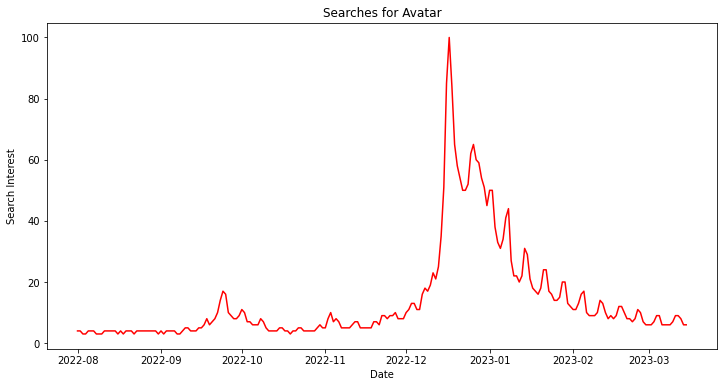

In [19]:

plt.figure(figsize=(12, 6))
plt.plot(search_data.index, search_data[search_term], color='red')
plt.title('Searches for ' + search_term)
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.show()


In [ ]:
import datetime

# Pre-defined release date
release_date_str = "2023-02-04"

# Convert release date string to datetime object
release_date = datetime.datetime.strptime(release_date_str, '%Y-%m-%d').date()

# Calculate date 6 months before release date
six_months_before_release = release_date - datetime.timedelta(days=6*30)

# Calculate date 6 months after release date
six_months_after_release = release_date + datetime.timedelta(days=6*30)

# Convert the dates back to strings in the format 'YYYY-MM-DD'
six_months_before_release_str = six_months_before_release.strftime('%Y-%m-%d')
six_months_after_release_str = six_months_after_release.strftime('%Y-%m-%d')

print("6 months before release date:", six_months_before_release_str)
print("6 months after release date:", six_months_after_release_str)


In [20]:
def get_six_month_range(release_date):
    # Calculate date 6 months before release date
    six_months_before_release = release_date - datetime.timedelta(days=6*30)

    # Calculate date 6 months after release date
    six_months_after_release = release_date + datetime.timedelta(days=6*30)

    # Convert the dates back to strings in the format 'YYYY-MM-DD'
    six_months_before_release_str = six_months_before_release.strftime('%Y-%m-%d')
    six_months_after_release_str = six_months_after_release.strftime('%Y-%m-%d')

    return pd.Series([six_months_before_release_str, six_months_after_release_str])

# # Example usage with a pandas DataFrame
# df = pd.DataFrame({'release_date': ['2023-06-01', '2024-01-01', '2022-09-01']})
# df[['six_months_before_release', 'six_months_after_release']] = df['release_date'].apply(get_six_month_range)
# df

In [21]:
movies[['six_months_before_release', 'six_months_after_release']] = movies['release_date_convert'].apply(get_six_month_range)
movies

,movie,year,url,metascore,userscore,release_date,release_date_convert,six_months_before_release,six_months_after_release
0,Roma,2018,/movie/roma,96,7.7,November 21,2018-11-21,2018-05-25,2019-05-20
1,Amazing Grace,2018,/movie/amazing-grace-1972,94,8.2,November 23,2018-11-23,2018-05-27,2019-05-22
2,Shoplifters,2018,/movie/shoplifters,93,8.4,November 23,2018-11-23,2018-05-27,2019-05-22
3,Shoah: Four Sisters,2018,/movie/shoah-four-sisters,93,tbd,November 14,2018-11-14,2018-05-18,2019-05-13
4,Gavagai,2018,/movie/gavagai,91,6.0,August 3,2018-08-03,2018-02-04,2019-01-30
...,...,...,...,...,...,...,...,...,...
2788,Big Gold Brick,2022,/movie/big-gold-brick,30,3.8,February 25,2022-02-25,2021-08-29,2022-08-24
2789,Mother Schmuckers,2022,/movie/mother-schmuckers,28,tbd,March 4,2022-03-04,2021-09-05,2022-08-31
2790,Blacklight,2022,/movie/blacklight,27,3.9,February 11,2022-02-11,2021-08-15,2022-08-10
2791,Me Time,2022,/movie/me-time,25,3.7,August 26,2022-08-26,2022-02-27,2023-02-22


In [23]:
movies['release_date_convert'] = pd.DatetimeIndex(movies['release_date_convert']).strftime('%Y-%m-%d')

In [86]:
def get_movie_trends(movie_title, start_date, end_date):
    try:
        pytrend.build_payload(kw_list=[movie_title], timeframe=start_date+' '+end_date)
        time.sleep(20) 
        interest_over_time_df = pytrend.interest_over_time()
        if not interest_over_time_df.empty:
            search_total = interest_over_time_df[movie_title].sum()
            return search_total
        else:
            return 0
    except requests.exception.Timeout:
        print("Timeout occured")
        

In [25]:
# Split the DataFrame into smaller DataFrames with 100 samples each
df_list = np.array_split(movies, len(movies) / 100)

# Print the number of smaller DataFrames created
print(f"Number of smaller DataFrames: {len(df_list)}")

Number of smaller DataFrames: 27


In [34]:
df_list[0:2]

[                             movie  year                                 url  \
 0                             Roma  2018                         /movie/roma   
 1                    Amazing Grace  2018           /movie/amazing-grace-1972   
 2                      Shoplifters  2018                  /movie/shoplifters   
 3              Shoah: Four Sisters  2018           /movie/shoah-four-sisters   
 4                          Gavagai  2018                      /movie/gavagai   
 ..                             ...   ...                                 ...   
 99              Hitler's Hollywood  2018            /movie/hitlers-hollywood   
 100                  Blindspotting  2018                /movie/blindspotting   
 101                Have a Nice Day  2018              /movie/have-a-nice-day   
 102  They'll Love Me When I'm Dead  2018  /movie/theyll-love-me-when-im-dead   
 103               On Body and Soul  2018             /movie/on-body-and-soul   
 
      metascore userscore 

In [78]:
df_list[7]

,movie,year,url,metascore,userscore,release_date,release_date_convert,six_months_before_release,six_months_after_release
728,The Breaker Upperers,2019,/movie/the-breaker-upperers,76,6.3,February 15,2019-02-15,2018-08-19,2019-08-14
729,Citizen K,2019,/movie/citizen-k,76,6.1,November 22,2019-11-22,2019-05-26,2020-05-20
730,Hail Satan?,2019,/movie/hail-satan,76,5.7,April 17,2019-04-17,2018-10-19,2019-10-14
731,Rojo,2019,/movie/rojo,76,6.6,July 12,2019-07-12,2019-01-13,2020-01-08
732,Temblores,2019,/movie/temblores,76,6.0,November 29,2019-11-29,2019-06-02,2020-05-27
...,...,...,...,...,...,...,...,...,...
827,The Elephant Queen,2019,/movie/the-elephant-queen,69,5.9,October 18,2019-10-18,2019-04-21,2020-04-15
828,Fighting with My Family,2019,/movie/fighting-with-my-family,68,7.2,February 14,2019-02-14,2018-08-18,2019-08-13
829,What She Said: The Art of Pauline Kael,2019,/movie/what-she-said-the-art-of-pauline-kael,68,tbd,December 13,2019-12-13,2019-06-16,2020-06-10
830,Ask Dr. Ruth,2019,/movie/ask-dr-ruth,68,7.8,May 10,2019-05-10,2018-11-11,2019-11-06


In [143]:
df_list[22]

,movie,year,url,metascore,userscore,release_date,release_date_convert,six_months_before_release,six_months_after_release,search_total_before_release,search_total_after_release
2278,All That Breathes,2022,/movie/all-that-breathes,87,8.1,October 21,2022-10-21,2022-04-24,2023-04-19,624,1526
2279,The Banshees of Inisherin,2022,/movie/the-banshees-of-inisherin,87,7.3,October 21,2022-10-21,2022-04-24,2023-04-19,1021,3178
2280,Playground,2022,/movie/playground,86,7.8,February 11,2022-02-11,2021-08-15,2022-08-10,13643,11694
2281,My Imaginary Country,2022,/movie/my-imaginary-country,86,tbd,September 23,2022-09-23,2022-03-27,2023-03-22,1633,2220
2282,Happening,2022,/movie/happening,86,7.3,May 6,2022-05-06,2021-11-07,2022-11-02,4498,11729
...,...,...,...,...,...,...,...,...,...,...,...
2376,Brighton 4th,2022,/movie/brighton-4th,76,tbd,January 28,2022-01-28,2021-08-01,2022-07-27,2728,2602
2377,Corsage,2022,/movie/corsage,76,6.3,December 23,2022-12-23,2022-06-26,2023-06-21,6904,3780
2378,All Quiet on the Western Front,2022,/movie/all-quiet-on-the-western-front-2022,76,7.9,October 7,2022-10-07,2022-04-10,2023-04-05,3036,1747
2379,Murina,2022,/movie/murina,76,3.3,July 8,2022-07-08,2022-01-09,2023-01-04,3403,2245


In [136]:
for data in df_list[22:27]:
    data['search_total_before_release'] = data.apply(lambda row: get_movie_trends(row['movie'], row['six_months_before_release'], row['release_date_convert']), axis=1)
    time.sleep(60) 

In [138]:
for data in df_list[22:27]:
    data['search_total_after_release'] = data.apply(lambda row: get_movie_trends(row['movie'], row['release_date_convert'], row['six_months_after_release']), axis=1)
    time.sleep(200)


In [144]:
count = 24
for dataset in df_list[23:27]:
    filename = f'dataset_{count}.csv'  # Generate a unique name for the CSV file
    dataset.to_csv(filename, index=False)  # Export the dataset to CSV
    count += 1  # Increment the counter variable for the next dataset    

In [152]:
result = pd.concat(df_list)
result = result.drop(['url', 'release_date', 'year'], axis=1)
result['total_search'] = result['search_total_before_release'] + result['search_total_after_release']
result

,movie,metascore,userscore,release_date_convert,six_months_before_release,six_months_after_release,search_total_before_release,search_total_after_release,total_search
0,Roma,96,7.7,2018-11-21,2018-05-25,2019-05-20,8481,9623,18104
1,Amazing Grace,94,8.2,2018-11-23,2018-05-27,2019-05-22,8707,8075,16782
2,Shoplifters,93,8.4,2018-11-23,2018-05-27,2019-05-22,4679,5670,10349
3,Shoah: Four Sisters,93,tbd,2018-11-14,2018-05-18,2019-05-13,1121,1379,2500
4,Gavagai,91,6.0,2018-08-03,2018-02-04,2019-01-30,1722,1248,2970
...,...,...,...,...,...,...,...,...,...
2788,Big Gold Brick,30,3.8,2022-02-25,2021-08-29,2022-08-24,349,902,1251
2789,Mother Schmuckers,28,tbd,2022-03-04,2021-09-05,2022-08-31,1195,1398,2593
2790,Blacklight,27,3.9,2022-02-11,2021-08-15,2022-08-10,1723,3581,5304
2791,Me Time,25,3.7,2022-08-26,2022-02-27,2023-02-22,10296,6817,17113


In [153]:
result.to_csv('google_trend.csv', index=False)

In [155]:
result[result['total_search']==0]

,movie,metascore,userscore,release_date_convert,six_months_before_release,six_months_after_release,search_total_before_release,search_total_after_release,total_search
5,A Bread Factory Part Two: Walk With Me a While,91,tbd,2018-10-26,2018-04-29,2019-04-24,0,0,0
6,A Bread Factory Part One: For the Sake of Gold,91,8.0,2018-10-26,2018-04-29,2019-04-24,0,0,0
27,En el Séptimo Día (On the Seventh Day),87,7.5,2018-06-08,2017-12-10,2018-12-05,0,0,0
175,Boom for Real: The Late Teenage Years of Jean-...,72,tbd,2018-05-11,2017-11-12,2018-11-07,0,0,0
233,Teen Titans Go! To the Movies,69,6.3,2018-07-27,2018-01-28,2019-01-23,0,0,0
253,40 Years in the Making: The Magic Music Movie,68,8.4,2018-08-03,2018-02-04,2019-01-30,0,0,0
304,"Westwood: Punk, Icon, Activist",64,tbd,2018-06-08,2017-12-10,2018-12-05,0,0,0
371,Mamma Mia! Here We Go Again,60,6.7,2018-07-20,2018-01-21,2019-01-16,0,0,0
471,Izzy Gets the F*ck Across Town,51,7.5,2018-06-22,2017-12-24,2018-12-19,0,0,0
583,"Game Over, Man!",32,5.0,2018-03-23,2017-09-24,2018-09-19,0,0,0


In [145]:
df_list[26]

,movie,year,url,metascore,userscore,release_date,release_date_convert,six_months_before_release,six_months_after_release,search_total_before_release,search_total_after_release
2690,The Score,2022,/movie/the-score-2022,51,tbd,June 3,2022-06-03,2021-12-05,2022-11-30,4357,5399
2691,Run Sweetheart Run,2022,/movie/run-sweetheart-run,51,4.8,October 28,2022-10-28,2022-05-01,2023-04-26,425,1406
2692,Day Shift,2022,/movie/day-shift,51,5.6,August 12,2022-08-12,2022-02-13,2023-02-08,442,1048
2693,Marry Me,2022,/movie/marry-me,51,8.4,February 11,2022-02-11,2021-08-15,2022-08-10,1729,2273
2694,"Lyle, Lyle, Crocodile",2022,/movie/lyle-lyle-crocodile,51,6.7,October 7,2022-10-07,2022-04-10,2023-04-05,594,3040
...,...,...,...,...,...,...,...,...,...,...,...
2788,Big Gold Brick,2022,/movie/big-gold-brick,30,3.8,February 25,2022-02-25,2021-08-29,2022-08-24,349,902
2789,Mother Schmuckers,2022,/movie/mother-schmuckers,28,tbd,March 4,2022-03-04,2021-09-05,2022-08-31,1195,1398
2790,Blacklight,2022,/movie/blacklight,27,3.9,February 11,2022-02-11,2021-08-15,2022-08-10,1723,3581
2791,Me Time,2022,/movie/me-time,25,3.7,August 26,2022-08-26,2022-02-27,2023-02-22,10296,6817


In [66]:
temp1 = df_list[0][['movie', 'release_date_convert', 'six_months_before_release', 'six_months_after_release','search_total_before_release','search_total_after_release']]
temp1['total_search'] = temp1['search_total_before_release'] + temp1['search_total_after_release']
temp1

<ipython-input-66-079b5d0570b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['total_search'] = temp1['search_total_before_release'] + temp1['search_total_after_release']


,movie,release_date_convert,six_months_before_release,six_months_after_release,search_total_before_release,search_total_after_release,total_search
0,Roma,2018-11-21,2018-05-25,2019-05-20,8481,9623,18104
1,Amazing Grace,2018-11-23,2018-05-27,2019-05-22,8707,8075,16782
2,Shoplifters,2018-11-23,2018-05-27,2019-05-22,4679,5670,10349
3,Shoah: Four Sisters,2018-11-14,2018-05-18,2019-05-13,1121,1379,2500
4,Gavagai,2018-08-03,2018-02-04,2019-01-30,1722,1248,2970
...,...,...,...,...,...,...,...
99,Hitler's Hollywood,2018-04-11,2017-10-13,2018-10-08,778,1412,2190
100,Blindspotting,2018-07-20,2018-01-21,2019-01-16,674,2277,2951
101,Have a Nice Day,2018-01-26,2017-07-30,2018-07-25,10951,13040,23991
102,They'll Love Me When I'm Dead,2018-11-02,2018-05-06,2019-05-01,915,1915,2830


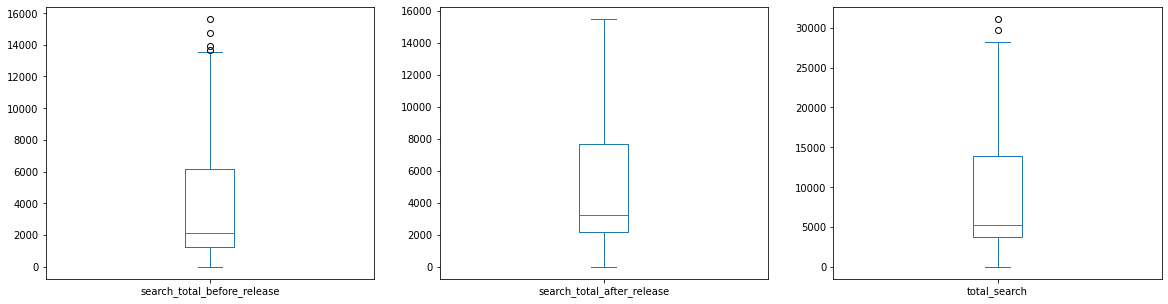

In [71]:
temp1.plot(kind='box',
    subplots=True, 
    sharey=False, # use different y scale
    figsize=(20, 5));

In [75]:
temp1.sort_values(by=['total_search'], ascending=False).head(20)

,movie,release_date_convert,six_months_before_release,six_months_after_release,search_total_before_release,search_total_after_release,total_search
62,Western,2018-02-16,2017-08-20,2018-08-15,15600,15450,31050
17,Crime + Punishment,2018-08-24,2018-02-25,2019-02-20,14755,14955,29710
59,Mountain,2018-05-11,2017-11-12,2018-11-07,13913,14347,28260
79,Ava,2018-04-27,2017-10-29,2018-10-24,13574,13785,27359
93,In Between,2018-01-05,2017-07-09,2018-07-04,13342,13990,27332
77,Wildlife,2018-10-19,2018-04-22,2019-04-17,13693,13571,27264
64,Revenge,2018-05-11,2017-11-12,2018-11-07,12134,12847,24981
46,Custody,2018-06-29,2017-12-31,2018-12-26,12781,11856,24637
101,Have a Nice Day,2018-01-26,2017-07-30,2018-07-25,10951,13040,23991
67,Mirai,2018-11-30,2018-06-03,2019-05-29,13044,9665,22709


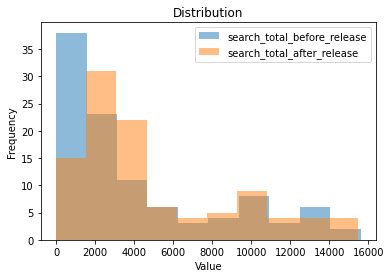

In [68]:
plt.hist(temp1['search_total_before_release'], alpha=0.5, label='search_total_before_release')
plt.hist(temp1['search_total_after_release'], alpha=0.5, label='search_total_after_release')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.legend(loc='upper right')
plt.show()

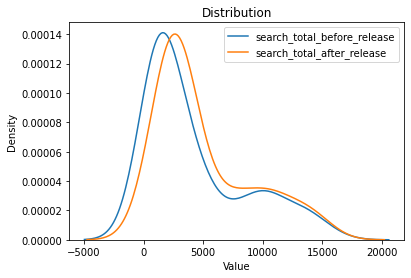

In [70]:
sns.kdeplot(temp1['search_total_before_release'], label='search_total_before_release')
sns.kdeplot(temp1['search_total_after_release'], label='search_total_after_release')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution')
plt.legend(loc='upper right')
plt.show()

In [101]:
df_list[9]

,movie,year,url,metascore,userscore,release_date,release_date_convert,six_months_before_release,six_months_after_release,search_total_before_release
936,Scandalous: The Untold Story of the National E...,2019,/movie/scandalous,60,tbd,November 15,2019-11-15,2019-05-19,2020-05-13,1379
937,The Angry Birds Movie 2,2019,/movie/the-angry-birds-movie-2,60,6.8,August 13,2019-08-13,2019-02-14,2020-02-09,1974
938,Isn't It Romantic,2019,/movie/isnt-it-romantic,60,5.6,February 13,2019-02-13,2018-08-17,2019-08-12,840
939,The Kill Team,2019,/movie/the-kill-team-2019,60,5.9,October 25,2019-10-25,2019-04-28,2020-04-22,1257
940,The Perfection,2019,/movie/the-perfection,60,6.1,May 24,2019-05-24,2018-11-25,2019-11-20,939
...,...,...,...,...,...,...,...,...,...,...
1035,Girls of the Sun,2019,/movie/girls-of-the-sun,51,7.3,April 12,2019-04-12,2018-10-14,2019-10-09,2610
1036,Farming,2019,/movie/farming,51,tbd,October 25,2019-10-25,2019-04-28,2020-04-22,15299
1037,Close,2019,/movie/close,51,4.5,January 18,2019-01-18,2018-07-22,2019-07-17,9555
1038,Satanic Panic,2019,/movie/satanic-panic,51,5.0,September 6,2019-09-06,2019-03-10,2020-03-04,1281


In [ ]:
movies['search_total_before_release'] = movies.apply(lambda row: get_movie_trends(row['movie'], row['six_months_before_release'], row['release_date_convert']), axis=1)
movies['search_total_after_release'] = movies.apply(lambda row: get_movie_trends(row['movie'], row['release_date_convert'], row['six_months_after_release']), axis=1)
